In [14]:
# If running in Google Colab, mount drive
print('Check if running in Colab...')
try:
    from google.colab import drive
    print('Running in Colab!')
    drive.mount('/content/drive')
    %cd '/content/drive/My Drive/CIL-FS20'
except ImportError:
    print('Running locally!')

    #Check python version
    from platform import python_version
    print('Current python version: {}'.format(python_version()))

    # Check available GPUs
    import tensorflow as tf
    no_GPUs_available = len(tf.config.experimental.list_physical_devices('GPU'))
    print("Number of GPUs Available: {}".format(no_GPUs_available))

Check if running in Colab...
Running locally!
Current python version: 3.6.10
Number of GPUs Available: 0


In [15]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D, Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.merge import concatenate
from keras import optimizers
from keras.layers import BatchNormalization
from tensorflow.keras.metrics import MeanIoU
from keras import backend as K
from keras.backend import binary_crossentropy
import keras
import random
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from datetime import datetime

from mask_to_submission import masks_to_submission
import util

## Install the following packages
import imageio
from PIL import Image
import cv2
import natsort

## Constants

In [16]:
# Name of the current model
MODEL_NAME = 'fullyCNN_datagenerator'

IMG_WIDTH = 608
IMG_HEIGHT = 608
EPOCHS = 100
STEPS_PER_EPOCH = 2000
LEARNING_RATE = 0.0001
BATCH_SIZE = 2
rnd_seed = 4
np.random.seed(rnd_seed)

## Load Images

In [17]:
training_image_dir = "training_images/images/"
training_label_dir = "training_images/groundtruth/"
test_image_dir = "test_images/"

files_image = os.listdir(training_image_dir)
files_image = natsort.natsorted(files_image)
files_label = os.listdir(training_label_dir)
files_label = natsort.natsorted(files_label)
files_test = os.listdir(test_image_dir)
files_test = natsort.natsorted(files_test)
n = len(files_image)
n_test = len(files_test) 

# Load list of numpy arrays of training images and labels
print("Loading " + str(n) + " training images")
training_image_list = []
training_label_list = []
for i in range(n):
    print("Loading training image {:04d}\r".format(i)),
    training_image_list.append(imageio.imread(training_image_dir + files_image[i], pilmode="RGB"))
    training_label_list.append(imageio.imread(training_label_dir + files_label[i], pilmode="L"))

# Load list of numpy arrays of test images
print("Loading " + str(n_test) + " test images")
test_image_list = [imageio.imread(test_image_dir + files_test[i]) for i in range(n_test)]

print("TRAINING:")
print(training_image_list[0].shape)
print(training_label_list[0].shape)
print("TEST:")
print(test_image_list[0].shape)

Loading 1570 training images
Loading training image 0000
Loading training image 0001
Loading training image 0002
Loading training image 0003
Loading training image 0004
Loading training image 0005
Loading training image 0006
Loading training image 0007
Loading training image 0008
Loading training image 0009
Loading training image 0010
Loading training image 0011
Loading training image 0012
Loading training image 0013
Loading training image 0014
Loading training image 0015
Loading training image 0016
Loading training image 0017
Loading training image 0018
Loading training image 0019
Loading training image 0020
Loading training image 0021
Loading training image 0022
Loading training image 0023
Loading training image 0024
Loading training image 0025
Loading training image 0026
Loading training image 0027
Loading training image 0028
Loading training image 0029
Loading training image 0030
Loading training image 0031
Loading training image 0032
Loading training image 0033
Loading training im

Loading training image 0297
Loading training image 0298
Loading training image 0299
Loading training image 0300
Loading training image 0301
Loading training image 0302
Loading training image 0303
Loading training image 0304
Loading training image 0305
Loading training image 0306
Loading training image 0307
Loading training image 0308
Loading training image 0309
Loading training image 0310
Loading training image 0311
Loading training image 0312
Loading training image 0313
Loading training image 0314
Loading training image 0315
Loading training image 0316
Loading training image 0317
Loading training image 0318
Loading training image 0319
Loading training image 0320
Loading training image 0321
Loading training image 0322
Loading training image 0323
Loading training image 0324
Loading training image 0325
Loading training image 0326
Loading training image 0327
Loading training image 0328
Loading training image 0329
Loading training image 0330
Loading training image 0331
Loading training ima

Loading training image 0593
Loading training image 0594
Loading training image 0595
Loading training image 0596
Loading training image 0597
Loading training image 0598
Loading training image 0599
Loading training image 0600
Loading training image 0601
Loading training image 0602
Loading training image 0603
Loading training image 0604
Loading training image 0605
Loading training image 0606
Loading training image 0607
Loading training image 0608
Loading training image 0609
Loading training image 0610
Loading training image 0611
Loading training image 0612
Loading training image 0613
Loading training image 0614
Loading training image 0615
Loading training image 0616
Loading training image 0617
Loading training image 0618
Loading training image 0619
Loading training image 0620
Loading training image 0621
Loading training image 0622
Loading training image 0623
Loading training image 0624
Loading training image 0625
Loading training image 0626
Loading training image 0627
Loading training ima

Loading training image 0886
Loading training image 0887
Loading training image 0888
Loading training image 0889
Loading training image 0890
Loading training image 0891
Loading training image 0892
Loading training image 0893
Loading training image 0894
Loading training image 0895
Loading training image 0896
Loading training image 0897
Loading training image 0898
Loading training image 0899
Loading training image 0900
Loading training image 0901
Loading training image 0902
Loading training image 0903
Loading training image 0904
Loading training image 0905
Loading training image 0906
Loading training image 0907
Loading training image 0908
Loading training image 0909
Loading training image 0910
Loading training image 0911
Loading training image 0912
Loading training image 0913
Loading training image 0914
Loading training image 0915
Loading training image 0916
Loading training image 0917
Loading training image 0918
Loading training image 0919
Loading training image 0920
Loading training ima

Loading training image 1184
Loading training image 1185
Loading training image 1186
Loading training image 1187
Loading training image 1188
Loading training image 1189
Loading training image 1190
Loading training image 1191
Loading training image 1192
Loading training image 1193
Loading training image 1194
Loading training image 1195
Loading training image 1196
Loading training image 1197
Loading training image 1198
Loading training image 1199
Loading training image 1200
Loading training image 1201
Loading training image 1202
Loading training image 1203
Loading training image 1204
Loading training image 1205
Loading training image 1206
Loading training image 1207
Loading training image 1208
Loading training image 1209
Loading training image 1210
Loading training image 1211
Loading training image 1212
Loading training image 1213
Loading training image 1214
Loading training image 1215
Loading training image 1216
Loading training image 1217
Loading training image 1218
Loading training ima

Loading training image 1485
Loading training image 1486
Loading training image 1487
Loading training image 1488
Loading training image 1489
Loading training image 1490
Loading training image 1491
Loading training image 1492
Loading training image 1493
Loading training image 1494
Loading training image 1495
Loading training image 1496
Loading training image 1497
Loading training image 1498
Loading training image 1499
Loading training image 1500
Loading training image 1501
Loading training image 1502
Loading training image 1503
Loading training image 1504
Loading training image 1505
Loading training image 1506
Loading training image 1507
Loading training image 1508
Loading training image 1509
Loading training image 1510
Loading training image 1511
Loading training image 1512
Loading training image 1513
Loading training image 1514
Loading training image 1515
Loading training image 1516
Loading training image 1517
Loading training image 1518
Loading training image 1519
Loading training ima

## Padd Images
Training images have size 400x400 and test images have size 608x608. So we need to pad training images to same size, 
for that I use mirror padding for now.

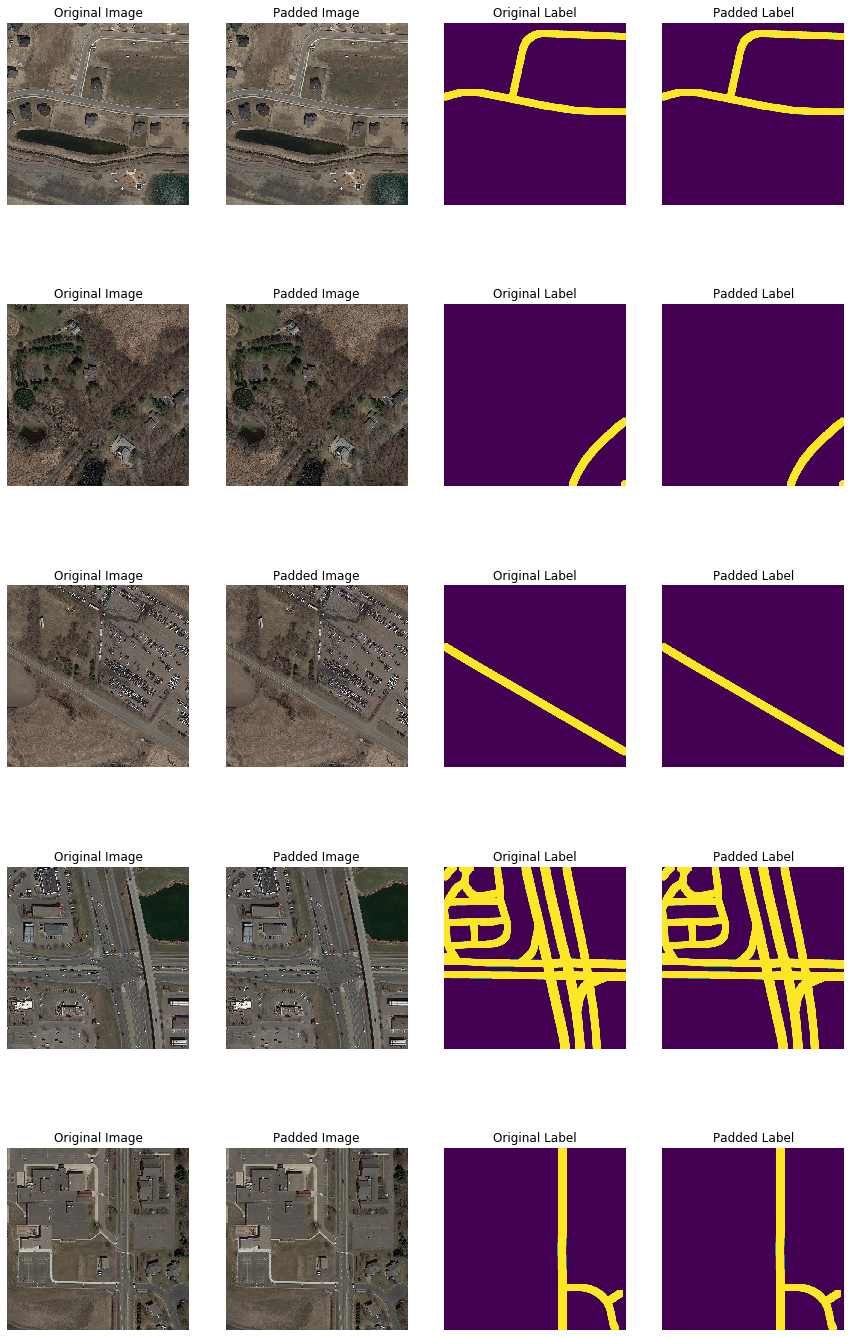

(1570, 608, 608, 3)
(1570, 608, 608, 1)


In [18]:
# Mirror padd all training images to get same size as test images
training_image_padded_list = []
training_label_padded_list = []
for i in range(n):
    training_image = training_image_list[i]
    training_label = training_label_list[i]
    height, width, _ = training_image.shape
    pad_y = int((IMG_HEIGHT - height) / 2)
    pad_x = int((IMG_WIDTH - height) / 2)
    training_image_padded_list.append(cv2.copyMakeBorder(training_image,pad_y,pad_y,pad_x,pad_x,cv2.BORDER_REFLECT))
    training_label_padded_list.append(cv2.copyMakeBorder(training_label,pad_y,pad_y,pad_x,pad_x,cv2.BORDER_REFLECT))

# Plot random Sample of images
index = random.randint(0, n-1)
num_samples = 5

f = plt.figure(figsize = (15, 25))
for i in range(1, num_samples*4, 4):
  index = random.randint(0, n-1)

  f.add_subplot(num_samples, 4, i)
  plt.imshow(training_image_list[index])
  plt.title("Original Image")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+1)
  plt.imshow(training_image_padded_list[index])
  plt.title("Padded Image")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+2)
  plt.imshow(np.squeeze(training_label_list[index]))
  plt.title("Original Label")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+3)
  plt.imshow(np.squeeze(training_label_padded_list[index]))
  plt.title("Padded Label")
  plt.axis('off')

plt.show()

# Convert image lists to numpy arrays for further processing
training_image = np.array(training_image_padded_list)
training_label = np.expand_dims(np.array(training_label_padded_list), -1)
test_image = np.array(test_image_list)
print(training_image.shape)
print(training_label.shape)

In [19]:
# Make sure label masks only have values 1 or zero
#thresh_val = 0.5
#training_label = (training_label > thresh_val).astype(np.uint8)
training_label = training_label/255
training_label = training_label.astype(np.float32)
#print(np.unique(training_label, return_counts=True, axis=None))
print(training_label.dtype)

# Get a validation set
training_image, validation_image, training_label, validation_label = train_test_split(
    training_image, training_label, test_size=0.1, random_state=rnd_seed)

# Rescale also validation images/labels and test images
validation_image = validation_image/255.0
validation_image = validation_image.astype(np.float32)
print(validation_image.dtype)
test_image = test_image/255.0
test_image = test_image.astype(np.float32)
print(test_image.dtype)

float32
float32
float32


## Augment Training Data

We use the Keras Data Generator to augment our training data online while training. This is necessary because of memory consumption.

In [8]:
# We create an instance for the training images, training labels and test images
data_gen_args = dict(rescale=1.0/255.0,
                     #rotation_range=360,
                     #width_shift_range=0.05,
                     #height_shift_range=0.05,
                     #zoom_range=0.05,
                     #shear_range=0.05,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='wrap')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
image_generator = image_datagen.flow(
    training_image,
    batch_size=BATCH_SIZE,
    #save_to_dir="training_images_augmented/images/",
    #save_prefix="",
    #save_format="png",
    seed=seed)
mask_generator = mask_datagen.flow(
    training_label,
    batch_size=BATCH_SIZE,
    #save_to_dir="training_images_augmented/groundtruth/",
    #save_prefix="",
    #save_format="png",
    seed=seed)

# Combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

MemoryError: Unable to allocate 5.84 GiB for an array with shape (1413, 608, 608, 3) and data type float32

## Loss Function and Accuracy Metric
- Accuracy: Intersection of prediction to label image over Union
- Loss :
    - Dice Coef Loss (https://arxiv.org/pdf/1606.04797v1.pdf)
    - Soft Dice Loss (Measure of interleaving of prediction image and label image)
    - Jaccard Distance

Source: https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99

In [20]:
from keras import backend as K

def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

def soft_dice_coef(y_true, y_pred, smooth = 1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def soft_dice_loss(y_true, y_pred):
    return 1-soft_dice_coef(y_true, y_pred)

def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

def jaccard_coef(y_true, y_pred, smooth = 1e-12):
    intersection = K.sum(y_true * y_pred, axis=[0, 1, 2])
    sum_ = K.sum(y_true + y_pred, axis=[0, 1, 2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)

def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))

    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)

def combined_loss(y_true, y_pred):
    return -K.log(jaccard_coef(y_true, y_pred)) + binary_crossentropy(y_pred, y_true)

## Model: Fully CNN built in Keras

In [ ]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, 3))

conv1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
conv1 = BatchNormalization() (conv1)
conv1 = Dropout(0.1) (conv1)
conv1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv1)
conv1 = BatchNormalization() (conv1)
pooling1 = MaxPooling2D((2, 2)) (conv1)

conv2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling1)
conv2 = BatchNormalization() (conv2)
conv2 = Dropout(0.1) (conv2)
conv2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv2)
conv2 = BatchNormalization() (conv2)
pooling2 = MaxPooling2D((2, 2)) (conv2)

conv3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling2)
conv3 = BatchNormalization() (conv3)
conv3 = Dropout(0.2) (conv3)
conv3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv3)
conv3 = BatchNormalization() (conv3)
pooling3 = MaxPooling2D((2, 2)) (conv3)

conv4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling3)
conv4 = BatchNormalization() (conv4)
conv4 = Dropout(0.2) (conv4)
conv4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv4)
conv4 = BatchNormalization() (conv4)
pooling4 = MaxPooling2D(pool_size=(2, 2)) (conv4)

conv5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling4)
conv5 = BatchNormalization() (conv5)
conv5 = Dropout(0.3) (conv5)
conv5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv5)
conv5 = BatchNormalization() (conv5)


upsample6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (conv5)
upsample6 = concatenate([upsample6, conv4])
conv6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample6)
conv6 = BatchNormalization() (conv6)
conv6 = Dropout(0.2) (conv6)
conv6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv6)
conv6 = BatchNormalization() (conv6)

upsample7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (conv6)
upsample7 = concatenate([upsample7, conv3])
conv7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample7)
conv7 = BatchNormalization() (conv7)
conv7 = Dropout(0.2) (conv7)
conv7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv7)
conv7 = BatchNormalization() (conv7)

upsample8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (conv7)
upsample8 = concatenate([upsample8, conv2])
conv8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample8)
conv8 = BatchNormalization() (conv8)
conv8 = Dropout(0.1) (conv8)
conv8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv8)
conv8 = BatchNormalization() (conv8)

upsample9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (conv8)
upsample9 = concatenate([upsample9, conv1], axis=3)
conv9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample9)
conv9 = BatchNormalization() (conv9)
conv9 = Dropout(0.1) (conv9)
conv9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv9)
conv9 = BatchNormalization() (conv9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv9)

model = Model(inputs=[inputs], outputs=[outputs])
model.summary()

## Callbacks for Observations

In [ ]:
#tbc=TensorBoardColab()
model_path = "./Models/{}_model.h5".format(MODEL_NAME)
checkpointer = ModelCheckpoint(model_path,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
csv_logger = CSVLogger("./Logs/{}_log.csv".format(MODEL_NAME), separator=',', append=False)
lr_reducer = ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1,
                               patience=6,
                               verbose=1,
                               epsilon=1e-4)
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

## Model Training

In [ ]:
#opt = keras.optimizers.adam(LEARNING_RATE)
opt = keras.optimizers.Nadam(lr=1e-4)
model.compile(
      optimizer=opt,
      loss=dice_coef,
      metrics=[iou_coef])

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data =(validation_image, validation_label),
                              steps_per_epoch=STEPS_PER_EPOCH,
                              epochs=EPOCHS,
                              callbacks = [checkpointer, csv_logger, lr_reducer])

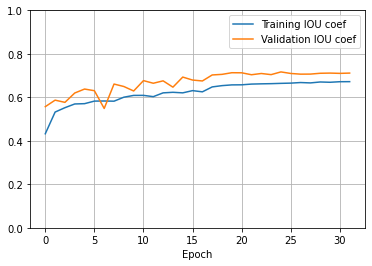

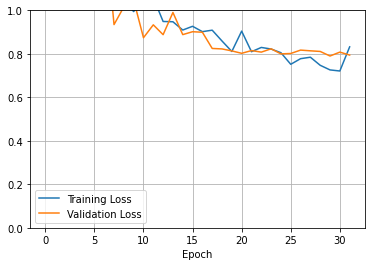

In [13]:
# Show a training report
training_info = pd.read_csv('./Logs/{}_log.csv'.format(MODEL_NAME), header=0)

acc1, = plt.plot(training_info['epoch'], training_info['iou_coef'])
acc2, = plt.plot(training_info['epoch'], training_info['val_iou_coef'])
plt.legend([acc1, acc2], ['Training IOU coef', 'Validation IOU coef'])
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.grid(True)
plt.show()

loss1, = plt.plot(training_info['epoch'], training_info['loss'])
loss2, = plt.plot(training_info['epoch'], training_info['val_loss'])
plt.legend([acc1, acc2], ['Training Loss', 'Validation Loss'])                            
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.grid(True)

plt.show()

## Model Evaluation

In [24]:
# Kaggle scores on validation images (mean score per image and overall mean score)
model = load_model("./Models/{}_model.h5".format(MODEL_NAME), custom_objects={'dice_coef_loss': dice_coef_loss, 'iou_coef': iou_coef})
y_pred = model.predict(validation_image, batch_size=4, verbose=1)
scores = util.validate_kaggle_score(validation_label, y_pred)
print(scores)
print(sum(scores)/len(scores))

157/157 [==============================] - 202s 1s/step
(157, 1444)
(array([0, 1]), array([202519,  24189], dtype=int64))
(157, 1444)
(array([0, 1]), array([203551,  23157], dtype=int64))
[0.8982630272952854, 0.9752066115702479, 0.7125382262996942, 0.9365558912386707, 0.8867924528301886, 0.5750000000000001, 0.914622178606477, 0.5992217898832685, 0.8502024291497976, 1.0, 0.9014084507042255, 0.9017341040462428, 0.8789986091794157, 0.8741721854304635, 0.944767441860465, 0.9339622641509433, 1.0, 0.9238095238095239, 0.7803837953091683, 0.9622166246851385, 1.0, 0.8384279475982532, 0.8333333333333334, 0.8442330558858503, 0.7864693446088795, 0.0, 0.4477611940298507, 1.0, 0.3253012048192771, 0.9071274298056156, 0.9666666666666667, 0.8979591836734694, 1.0, 0.8883248730964467, 0.8534482758620691, 0.9251336898395721, 0.8856088560885608, 0.8767999999999999, 0.0, 0.9344262295081968, 1.0, 0.5128205128205128, 0.7773851590106007, 0.9325153374233129, 0.8545454545454545, 0.9056603773584906, 0.85250338294

In [30]:
model = load_model("./Models/{}_model.h5".format(MODEL_NAME), custom_objects={'dice_coef_loss': dice_coef_loss, 'iou_coef': iou_coef})
#model.evaluate(test_images, test_label)
predictions = model.predict(test_image, batch_size=4, verbose=1)

94/94 [==============================] - 122s 1s/step


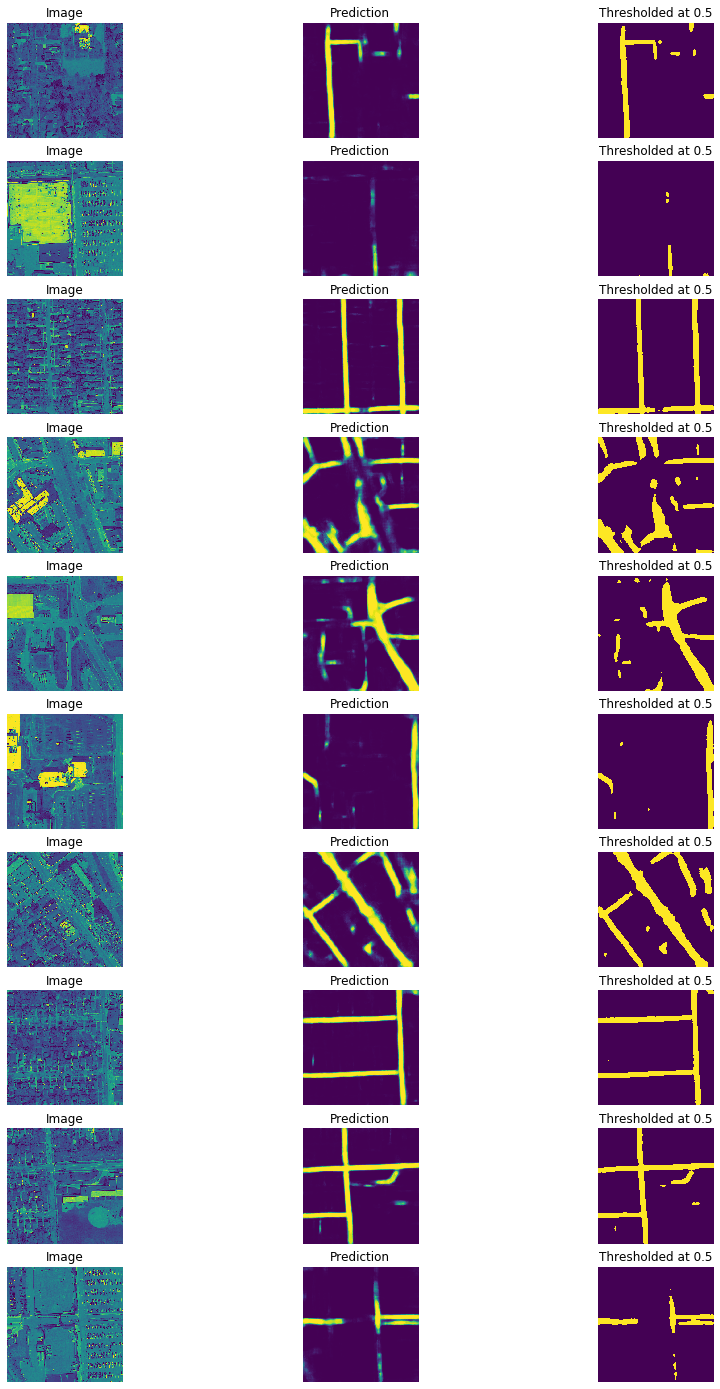

In [31]:
thresh_val = 0.5
predicton_threshold = (predictions > thresh_val).astype(np.uint8)

index = random.randint(0, len(predictions)-1)
num_samples = 10

f = plt.figure(figsize = (15, 25))
for i in range(1, num_samples*3, 3):
  index = random.randint(0, len(predictions)-1)

  f.add_subplot(num_samples, 3, i)
  plt.imshow(test_image[index][:,:,0])
  plt.title("Image")
  plt.axis('off')

  f.add_subplot(num_samples, 3, i+1)
  plt.imshow(np.squeeze(predictions[index][:,:,0]))
  plt.title("Prediction")
  plt.axis('off')

  f.add_subplot(num_samples, 3, i+2)
  plt.imshow(np.squeeze(predicton_threshold[index][:,:,0]))
  plt.title("Thresholded at {}".format(thresh_val))
  plt.axis('off')

plt.show()

## Create Submission File
Multiply image by 255 and convert to unit8 before storing s.t. it gets read out correctly by mask_to_submission!

In [16]:
predictions = np.squeeze(predictions*255)
predictions = predictions.astype(np.uint8)
result_dir = './Results/Prediction_Images/{}/'.format(MODEL_NAME)
os.makedirs(result_dir, exist_ok=True)

#print(predictions.shape)
#[print(predictions[i].shape) for i in range(n_test)]

[imageio.imwrite(result_dir + files_test[i], predictions[i],) for i in range(n_test)]
files_predictions = os.listdir(result_dir)
files_predictions = [result_dir + files_predictions[i] for i in range(n_test)]
masks_to_submission('./Results/Submissions/{}.csv'.format(MODEL_NAME), *files_predictions)
print('Submission ready')

./Results/Prediction_Images/fullyCNN_datagenerator/test_211.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_49.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_10.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_136.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_92.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_177.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_76.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_64.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_23.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_80.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_51.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_9.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_14.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_108.png
./Results/Prediction_Images/fullyCNN_datagenerator/test_139.png
./Results/Prediction_Images/fullyCNN_datagenerator/